<a href="https://colab.research.google.com/github/pranauww/Tensorflow/blob/main/SalesPredictionUsingTemp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
sales_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SalesData.csv')

In [5]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [6]:
sales_df.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [7]:
sales_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [9]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


<Axes: xlabel='Temperature', ylabel='Revenue'>

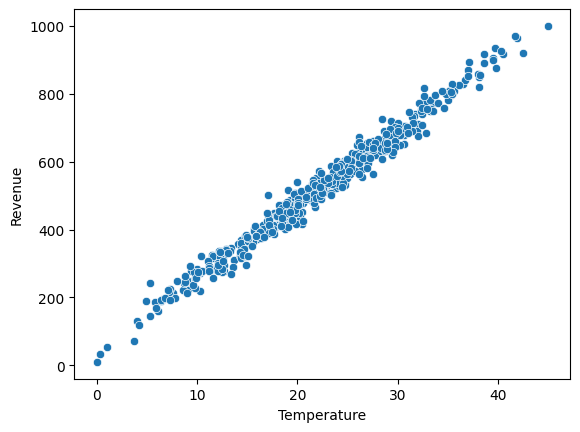

In [10]:
sns.scatterplot(data=temp_df, x="Temperature", y="Revenue")

In [24]:
X_train = sales_df['Temperature']
Y_train = sales_df['Revenue']

In [25]:
X_train.shape

(500,)

In [26]:
Y_train.shape

(500,)

In [27]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [30]:
epochs_hist = model.fit(X_train, Y_train, epochs= 500)

Epoch 1/500
16/16 [==============================] - 0s 2ms/step - loss: 278193.8438
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 238875.0312
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 203608.1719
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 172184.1719
Epoch 5/500
16/16 [==============================] - 0s 2ms/step - loss: 144732.6406
Epoch 6/500
16/16 [==============================] - 0s 2ms/step - loss: 120977.3125
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 100031.8750
Epoch 8/500
16/16 [==============================] - 0s 2ms/step - loss: 82253.6406
Epoch 9/500
16/16 [==============================] - 0s 2ms/step - loss: 67283.6875
Epoch 10/500
16/16 [==============================] - 0s 2ms/step - loss: 54483.6133
Epoch 11/500
16/16 [==============================] - 0s 2ms/step - loss: 43772.4883
Epoch 12/500
16/16 [==============================] - 0s 2ms/step -

In [31]:
epochs_hist.history.keys()

dict_keys(['loss'])

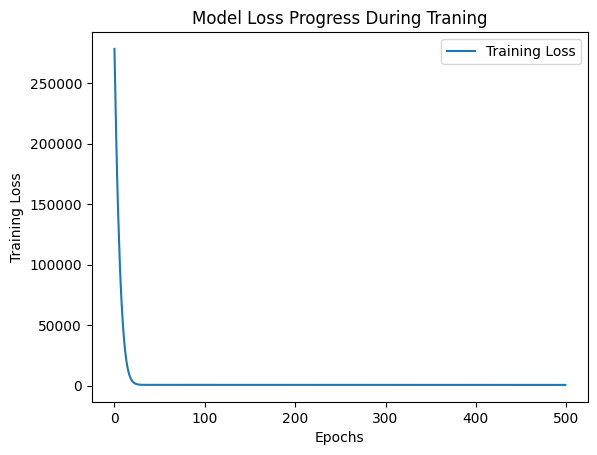

In [32]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Traning')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [33]:
model.get_weights()

[array([[21.386797]], dtype=float32), array([44.778126], dtype=float32)]

In [35]:
# Using the trained model for predictions

Temp = 5
Revenue = model.predict([Temp])
print('Revenue Predictions Using Trained ANN =', Revenue)

1/1 [==============================] - 0s 61ms/step
Revenue Predictions Using Trained ANN = [[151.71211]]


16/16 [==============================] - 0s 2ms/step


Text(0, 0.5, 'Revenue [$]')

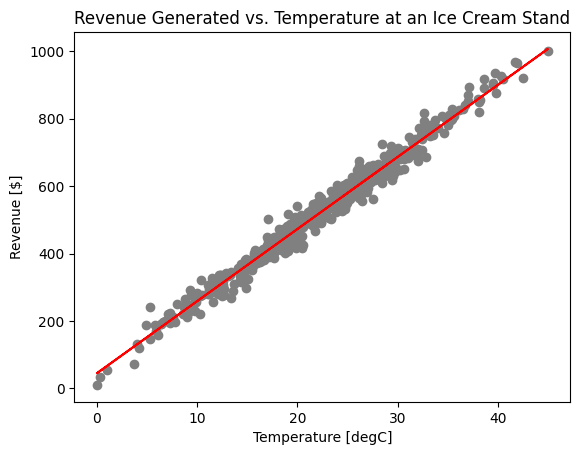

In [36]:
plt.scatter(X_train, Y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.title('Revenue Generated vs. Temperature at an Ice Cream Stand')
plt.xlabel('Temperature [degC]')
plt.ylabel('Revenue [$]')

In [37]:
X_train = X_train.values.reshape(-1,1)

In [38]:
X_train.shape

(500, 1)

In [39]:
Y_train = Y_train.values.reshape(-1,1)

In [40]:
Y_train.shape

(500, 1)

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = False)
regressor.fit(X_train, Y_train)

LinearRegression(fit_intercept=False)

In [46]:
print('Linear Model Coeff(m)', regressor.coef_)
print('Linear Model Coeff(b)', regressor.intercept_)

Linear Model Coeff(m) [[23.22442357]]
Linear Model Coeff(b) 0.0


Text(0, 0.5, 'Revenue [$]')

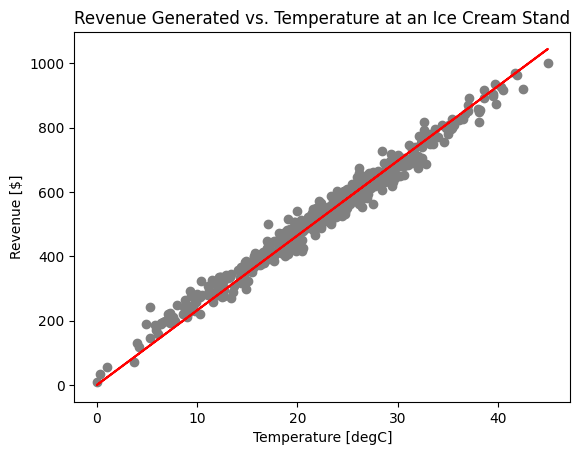

In [47]:
plt.scatter(X_train, Y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Revenue Generated vs. Temperature at an Ice Cream Stand')
plt.xlabel('Temperature [degC]')
plt.ylabel('Revenue [$]')